Epoch 1/50


C:\Users\91820\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


937/937 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6469 - val_loss: 0.5592
Epoch 2/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5445 - val_loss: 0.5576
Epoch 3/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5039 - val_loss: 0.5699
Epoch 4/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4995 - val_loss: 0.4654
Epoch 5/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4756 - val_loss: 0.4995
Epoch 6/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4711 - val_loss: 0.4880
Epoch 7/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4585 - val_loss: 0.4439
Epoch 8/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4498 - val_loss: 0.4571
Epoch 9/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4569 - val_loss: 0.4499
Epoch 10/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4566 - val_loss: 0.4720
Epoch 11/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4415 - val_loss: 0.4337
Epoch 12/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.

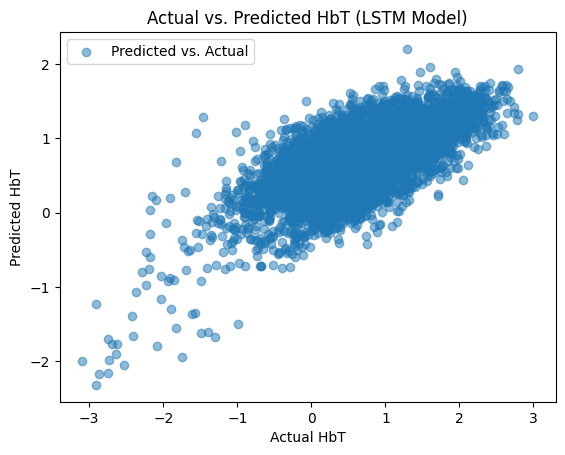

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Read the Excel file that contains the ABP and HbT data
abp_data_path = r"C:\Users\91820\Documents\Jupyter\Report3\s5_ABP_fft1.xlsx"  # Change to your file path
hbt_data_path = r"C:\Users\91820\Documents\Jupyter\Report3\s5_ABP_fft1.xlsx"  # Change to your file path

# Load the data from Excel files
df_abp = pd.read_excel(abp_data_path)  # Load ABP data
df_hbt = pd.read_excel(hbt_data_path)  # Load HbT data

# Extract ABP, HbT, and time data
abp = df_abp["blood pressure (mmHg)"].values
hbt = df_hbt["Ch_8: delta [HbT] (micromolar)"].values
time = df_abp["time (s)"].values  # Assuming there's a "Time" column

# Prepare the data for LSTM (time-series)
sequence_length = 10  # Change this to adjust how much history you consider

# Create sequences
X = []
y = []

for i in range(len(abp) - sequence_length):
    X.append(abp[i:i+sequence_length])
    y.append(hbt[i+sequence_length])

X = np.array(X)  # Shape (samples, sequence_length, features)
y = np.array(y)  # Shape (samples,)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = keras.Sequential([
    keras.layers.LSTM(32, input_shape=(sequence_length, 1)),  # LSTM layer with 32 units
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error for regression

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print("Test loss (MSE):", test_loss)

# Predict HbT from ABP using the trained model
predictions = model.predict(X_test)

# Calculate MAE and MSE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Calculate the relative accuracy in percentage
hbt_range = hbt.max() - hbt.min()  # Range of HbT values
relative_accuracy = 100 * (1 - (mae / hbt_range))  # Relative accuracy as a percentage

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Relative Accuracy (%):", relative_accuracy)

# Visualize actual vs. predicted values
plt.scatter(y_test, predictions, alpha=0.5, label="Predicted vs. Actual")
plt.xlabel("Actual HbT")
plt.ylabel("Predicted HbT")
plt.legend()
plt.title("Actual vs. Predicted HbT (LSTM Model)")
plt.show()


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Function to predict HbT values given new ABP data
def predict_hbt_from_abp(abp_values, model, sequence_length):
    # Ensure the input data is a NumPy array and has the correct shape
    abp_values = np.array(abp_values).reshape(-1, sequence_length, 1)
    
    # Use the trained model to predict HbT values
    predictions = model.predict(abp_values)
    
    return predictions

# Let's assume your model and sequence length are already defined
# For demonstration, we're assuming you have a trained LSTM model named 'model'
sequence_length = 10  # Adjust this based on your model's input shape

# Ask the user for the number of ABP values
n_values = int(input("Enter the number of ABP values to predict HbT: "))

# Collect the ABP values from user input
abp_values = []
for i in range(n_values):
    abp_value = float(input(f"Enter ABP value {i + 1}: "))  # Convert to float
    abp_values.append(abp_value)

# Ensure the input length matches the expected sequence length
if len(abp_values) < sequence_length:
    # Pad with the last value to make up the sequence length
    abp_values += [abp_values[-1]] * (sequence_length - len(abp_values))
elif len(abp_values) > sequence_length:
    # Trim to the required sequence length
    abp_values = abp_values[-sequence_length:]

# Predict HbT based on the given ABP values
hbt_prediction = predict_hbt_from_abp(abp_values, model, sequence_length)

print(f"Predicted HbT for the given ABP values: {hbt_prediction.flatten()}")


Enter the number of ABP values to predict HbT:  2
Enter ABP value 1:  120.65
Enter ABP value 2:  97.548


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None